## Задача предсказания среднего заработка

https://archive.ics.uci.edu/ml/datasets/Adult

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_adult = pd.read_csv('./data.adult.csv')
data_adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K


In [3]:
data_adult['>50K,<=50K'].value_counts()

<=50K    12244
>50K      4036
Name: >50K,<=50K, dtype: int64

In [4]:
assert data_adult.shape[0] == 16280
assert data_adult.shape[1] == 14

In [6]:
data_adult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,16280.000000,1.628000e+04,16280.000000,16280.000000,16280.000000,16280.000000
mean,38.635074,1.894594e+05,10.098219,1020.417752,86.696314,40.403686
std,13.635301,1.066644e+05,2.567690,6862.041550,402.308715,12.341191
min,17.000000,1.930200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.170068e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781340e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.371630e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Средний возраст составляет около 38.5 лет. Признак fnlwgt понимается как некая оценка человека по его демографическим характеристикам (пол, раса, возраст). Люди с аналогичными демографическими характеристиками должны иметь одинаковый вес.

Интересно, что значения 75-перцентиля признаков 'прирост капитала' и 'потери капитала' равны 0

In [12]:
data_adult.describe(percentiles=[0.9 , 0.92, 0.93, 0.95, 0.96, 0.97, 0.99])

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,16280.000000,1.628000e+04,16280.000000,16280.000000,16280.000000,16280.000000
mean,38.635074,1.894594e+05,10.098219,1020.417752,86.696314,40.403686
std,13.635301,1.066644e+05,2.567690,6862.041550,402.308715,12.341191
min,17.000000,1.930200e+04,1.000000,0.000000,0.000000,1.000000
50%,37.000000,1.781340e+05,10.000000,0.000000,0.000000,40.000000
90%,58.000000,3.291440e+05,13.000000,0.000000,0.000000,55.000000
92%,60.000000,3.459996e+05,14.000000,2174.000000,0.000000,60.000000
93%,61.000000,3.554722e+05,14.000000,3103.000000,0.000000,60.000000
95%,63.000000,3.823680e+05,14.000000,5013.000000,0.000000,60.000000
96%,65.000000,4.006278e+05,14.000000,7298.000000,1579.000000,60.000000


Лишь для перцентилей свыше 90 'прирост капитала' и 'потери капитала' начинают отличаться от 0.

In [7]:
data_adult['sex'].value_counts()

Male      10919
Female     5361
Name: sex, dtype: int64

Мужчин в датасете в 2 раза больше, чем женщин

Посмотрим на состав датасета по классам

In [22]:
data_adult['workclass'].value_counts()

Private             11282
Self-emp-not-inc     1324
Local-gov            1067
?                     929
State-gov             645
Self-emp-inc          561
Federal-gov           461
Without-pay             7
Never-worked            4
Name: workclass, dtype: int64

<BarContainer object of 9 artists>

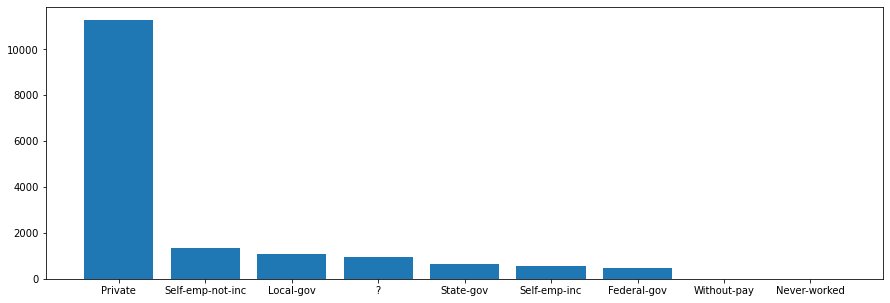

In [25]:
work_dict = dict(data_adult['workclass'].value_counts())
names = list(work_dict.keys())
values = list(work_dict.values())
fig, axs = plt.subplots(1, 1, figsize=(15, 5), sharey=True)
axs.bar(names, values)

In [23]:
data_adult['education'].value_counts()

HS-grad         5214
Some-college    3649
Bachelors       2672
Masters          880
Assoc-voc        727
11th             588
Assoc-acdm       534
10th             460
7th-8th          328
Prof-school      300
9th              261
12th             207
Doctorate        202
5th-6th          154
1st-4th           75
Preschool         29
Name: education, dtype: int64

In [24]:
data_adult['occupation'].value_counts()

Prof-specialty       2095
Craft-repair         2057
Exec-managerial      2017
Adm-clerical         1844
Sales                1840
Other-service        1617
Machine-op-inspct    1023
?                     933
Transport-moving      799
Handlers-cleaners     674
Farming-fishing       481
Tech-support          464
Protective-serv       343
Priv-house-serv        90
Armed-Forces            3
Name: occupation, dtype: int64

In [28]:
data_adult['race'].value_counts()

White                 13912
Black                  1557
Asian-Pac-Islander      527
Amer-Indian-Eskimo      158
Other                   126
Name: race, dtype: int64

Видим, что имеется дисбаланс данных по расе(преобладают белые), по классу работы(преобладает класс 'private') и не такой большой, но все же дисбаланс по образованию (в пользу high school).

In [3]:
data_adult_2 = data_adult.replace('?', np.nan)
data_adult_3 = data_adult_2.dropna()

In [4]:
data_adult_4 = data_adult_3.replace({'<=50K': -1, '>50K': 1})

In [5]:
target = data_adult_4['>50K,<=50K']

In [6]:
data_adult_5 = data_adult_4.drop(columns = ['>50K,<=50K'])
data_adult_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15347 entries, 0 to 16279
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             15347 non-null  int64 
 1   workclass       15347 non-null  object
 2   fnlwgt          15347 non-null  int64 
 3   education       15347 non-null  object
 4   education-num   15347 non-null  int64 
 5   marital-status  15347 non-null  object
 6   occupation      15347 non-null  object
 7   relationship    15347 non-null  object
 8   race            15347 non-null  object
 9   sex             15347 non-null  object
 10  capital-gain    15347 non-null  int64 
 11  capital-loss    15347 non-null  int64 
 12  hours-per-week  15347 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 1.6+ MB


In [7]:
data_adult_numerical_features = data_adult_5.select_dtypes(exclude = 'object')

In [8]:
assert data_adult_numerical_features.shape[0] == 15347
assert data_adult_numerical_features.shape[1] == 6

In [9]:
assert len(target) == 15347
assert target[123] == -1
assert target[1489] == 1

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_adult_numerical_features, target, test_size=0.25, random_state=13, 
                                                    shuffle = True, stratify = target)

In [ ]:
def make_plot_of_results_of_grid_search_depends_on_param(algorithm_name,
                                                         hyperparam_name,
                                                         cv_results_,
                                                         xmin,
                                                         xmax,
                                                         ymin,
                                                         ymax,
                                                         ):
    plt.figure(figsize=(16, 10))
    plt.title(algorithm_name, fontsize=16)

    plt.xlabel(hyperparam_name, fontsize=14)
    plt.ylabel("F1 Score", fontsize=14)

    ax = plt.gca()
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

    X_axis = cv_results_[hyperparam_name]
    Y_axis = cv_results_['mean_train_score']
    Y2_axis = cv_results_["mean_test_score"]
    Y3_axis_min = Y_axis - cv_results_['std_train_score']
    Y3_axis_max = Y_axis + cv_results_['std_train_score']
    Y4_axis_min = Y2_axis - cv_results_['std_test_score']
    Y4_axis_max = Y2_axis + cv_results_['std_test_score']
    ax.plot(X_axis, Y_axis,color='deepskyblue', label = 'auc_train_mean')
    ax.fill_between(list(X_axis), list(Y3_axis_min), list(Y3_axis_max), color='lightcoral', label = 'std error on train data')

    ax.plot(X_axis, Y2_axis, color = 'lime', label = 'auc_test_mean')
    ax.fill_between(list(X_axis), list(Y4_axis_min), list(Y4_axis_max), color='pink',  label = 'std error on test data')

    plt.legend(loc="best")
    plt.show()

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

### KNN

In [68]:
knn = KNeighborsClassifier()
gridknn = {'n_neighbors': np.linspace(1,50,50, dtype=int), 'p':[1, 2]}
knn_grid = GridSearchCV(knn, gridknn, scoring='f1', return_train_score = True)
knn_grid.fit(X_train, y_train)
print('Best parameters', knn_grid.best_params_)
print('ROC AUC', knn_grid.best_score_)

Best parameters {'n_neighbors': 1, 'p': 1}
ROC AUC 0.4089829440838989


In [79]:
cv_results_knn = pd.DataFrame(knn_grid.cv_results_)
cv_results_knn_ = cv_results_knn.drop(cv_results_knn[cv_results_knn['param_p'] == 2].index)
cv_results_knn_.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.035778,6.203794e-03,0.107739,0.002649,1,1,"{'n_neighbors': 1, 'p': 1}",0.412805,0.413850,0.415712,...,0.408983,0.006790,1,0.998733,0.999154,0.999366,0.999577,0.998942,0.999154,0.000299
2,0.033775,9.786552e-04,0.115132,0.002131,2,1,"{'n_neighbors': 2, 'p': 1}",0.328029,0.338164,0.327670,...,0.330325,0.012934,11,0.583159,0.577189,0.582309,0.584855,0.594948,0.584492,0.005820
4,0.031980,8.064048e-07,0.110133,0.000749,3,1,"{'n_neighbors': 3, 'p': 1}",0.398414,0.380671,0.390735,...,0.387208,0.010083,3,0.646579,0.644262,0.649241,0.646085,0.656613,0.648556,0.004332
6,0.034577,1.623624e-03,0.127320,0.015113,4,1,"{'n_neighbors': 4, 'p': 1}",0.323907,0.311224,0.311392,...,0.323308,0.010656,15,0.454203,0.461634,0.474807,0.466543,0.483436,0.468125,0.010174
8,0.032778,1.600196e-03,0.111730,0.001468,5,1,"{'n_neighbors': 5, 'p': 1}",0.376844,0.348315,0.357224,...,0.358515,0.010339,5,0.518126,0.519922,0.530624,0.526810,0.540659,0.527228,0.008103


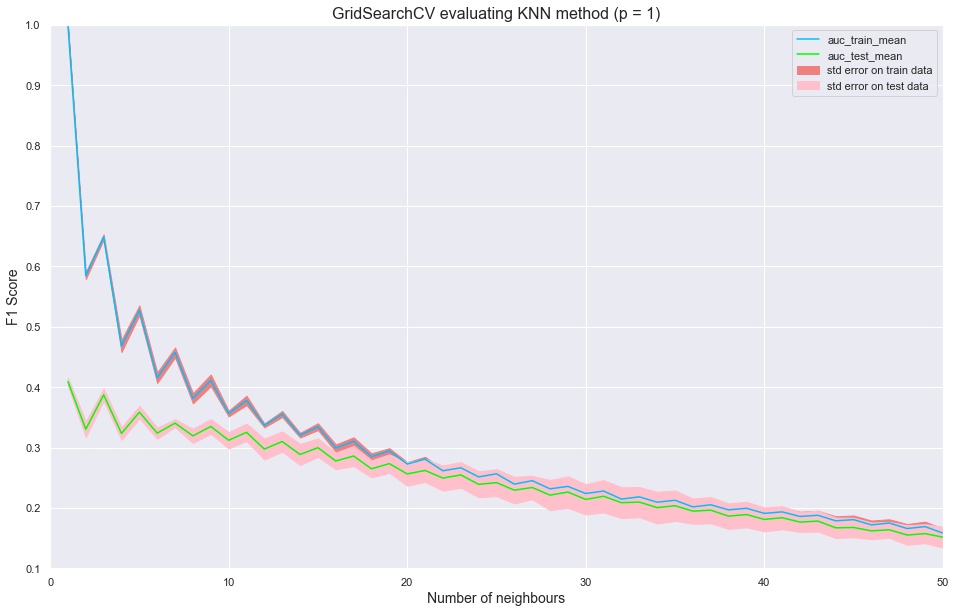

In [159]:
plt.figure(figsize=(16, 10))
plt.title("GridSearchCV evaluating KNN method (p = 1)", fontsize=16)

plt.xlabel("Number of neighbours", fontsize=14)
plt.ylabel("F1 Score", fontsize=14)

ax = plt.gca()
ax.set_xlim(0, 50)
ax.set_ylim(0.1, 1)

X_axis = cv_results_knn_["param_n_neighbors"]
Y_axis = cv_results_knn_['mean_train_score']
Y2_axis = cv_results_knn_["mean_test_score"]
Y3_axis_min = Y_axis - cv_results_knn_['std_train_score']
Y3_axis_max = Y_axis + cv_results_knn_['std_train_score']
Y4_axis_min = Y2_axis - cv_results_knn_['std_test_score']
Y4_axis_max = Y2_axis + cv_results_knn_['std_test_score']
ax.plot(X_axis, Y_axis,color='deepskyblue', label = 'auc_train_mean')
ax.fill_between(list(X_axis), list(Y3_axis_min), list(Y3_axis_max), color='lightcoral', label = 'std error on train data')

ax.plot(X_axis, Y2_axis, color = 'lime', label = 'auc_test_mean')
ax.fill_between(list(X_axis), list(Y4_axis_min), list(Y4_axis_max), color='pink',  label = 'std error on test data')

plt.legend(loc="best")
plt.show()

### Logistic regression

In [23]:
logreg = LogisticRegression(solver= 'liblinear')
gridlogreg = {'C': np.logspace(-3,3,40), 'penalty':['l1', 'l2']}
logreg_grid = GridSearchCV(logreg, gridlogreg, scoring='f1', return_train_score = True)
logreg_grid.fit(X_train, y_train)
print('Best parameters', logreg_grid.best_params_)
print('Best score', logreg_grid.best_score_)

Best parameters {'C': 20.30917620904739, 'penalty': 'l1'}
Best score 0.5035155174885846


In [30]:
cv_results_logreg = pd.DataFrame(logreg_grid.cv_results_)
cv_results_logreg_ = cv_results_logreg.drop(cv_results_logreg[cv_results_logreg['param_penalty'] == 'l2'].index)
cv_results_logreg_.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014192,0.003188,0.003398,0.000490,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",0.375622,0.363409,0.377404,...,0.378709,0.013739,79,0.381953,0.382544,0.390304,0.375270,0.383857,0.382786,0.004794
2,0.015390,0.003553,0.003198,0.000400,0.001425,l1,"{'C': 0.0014251026703029977, 'penalty': 'l1'}",0.375622,0.361355,0.376951,...,0.377721,0.013533,80,0.382480,0.383163,0.389810,0.375387,0.384094,0.382987,0.004601
4,0.012193,0.001469,0.003198,0.000400,0.002031,l1,"{'C': 0.002030917620904735, 'penalty': 'l1'}",0.375622,0.365457,0.375598,...,0.378867,0.012643,77,0.381599,0.382781,0.390558,0.375387,0.384687,0.383002,0.004898
6,0.012592,0.001624,0.003398,0.000490,0.002894,l1,"{'C': 0.0028942661247167516, 'penalty': 'l1'}",0.375622,0.365457,0.376951,...,0.378826,0.012710,78,0.381717,0.382781,0.390049,0.375387,0.383477,0.382682,0.004671
8,0.021387,0.006340,0.003398,0.000489,0.004125,l1,"{'C': 0.004124626382901352, 'penalty': 'l1'}",0.390062,0.376884,0.382212,...,0.390506,0.014970,36,0.391733,0.391452,0.395584,0.385900,0.394210,0.391776,0.003319


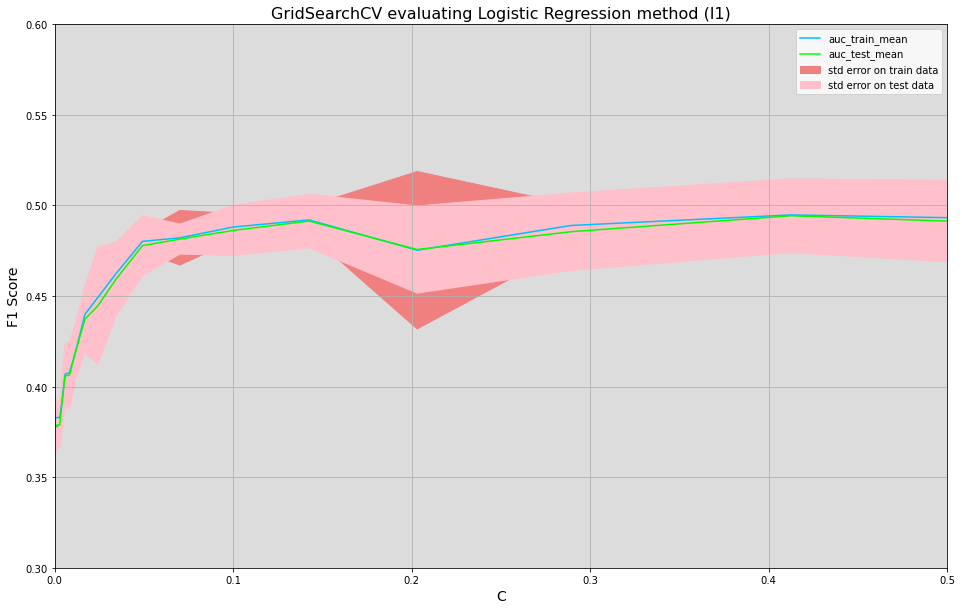

In [47]:
plt.figure(figsize=(16, 10))
plt.title("GridSearchCV evaluating Logistic Regression method (l1)", fontsize=16)

plt.xlabel("C", fontsize=14)
plt.ylabel("F1 Score", fontsize=14)

ax = plt.gca()
ax.set_xlim(0, 0.5)
ax.set_ylim(0.3, 0.6)

X_axis = cv_results_logreg_["param_C"]
Y_axis = cv_results_logreg_['mean_train_score']
Y2_axis = cv_results_logreg_["mean_test_score"]
Y3_axis_min = Y_axis - cv_results_logreg_['std_train_score']
Y3_axis_max = Y_axis + cv_results_logreg_['std_train_score']
Y4_axis_min = Y2_axis - cv_results_logreg_['std_test_score']
Y4_axis_max = Y2_axis + cv_results_logreg_['std_test_score']
ax.plot(X_axis, Y_axis,color='deepskyblue', label = 'auc_train_mean')
ax.fill_between(list(X_axis), list(Y3_axis_min), list(Y3_axis_max), color='lightcoral', label = 'std error on train data')

ax.plot(X_axis, Y2_axis, color = 'lime', label = 'auc_test_mean')
ax.fill_between(list(X_axis), list(Y4_axis_min), list(Y4_axis_max), color='pink',  label = 'std error on test data')
ax.grid()
ax.set_facecolor('gainsboro')
plt.legend(loc="best")
plt.show()

### Decision Tree

In [50]:
dectree = DecisionTreeClassifier(random_state = 13)
griddectree = {'max_depth': np.linspace(1,50,50, dtype=int), 'criterion':['gini', 'entropy']}
dectree_grid = GridSearchCV(dectree, griddectree, scoring='f1', return_train_score = True)
dectree_grid.fit(X_train, y_train)
print('Best parameters', dectree_grid.best_params_)
print('Best score', dectree_grid.best_score_)

Best parameters {'criterion': 'gini', 'max_depth': 3}
Best score 0.5797208276677696


In [55]:
cv_results_dectree = pd.DataFrame(dectree_grid.cv_results_)
cv_results_dectree_ = cv_results_dectree.drop(cv_results_dectree[cv_results_dectree['param_criterion'] == 'entropy'].index)

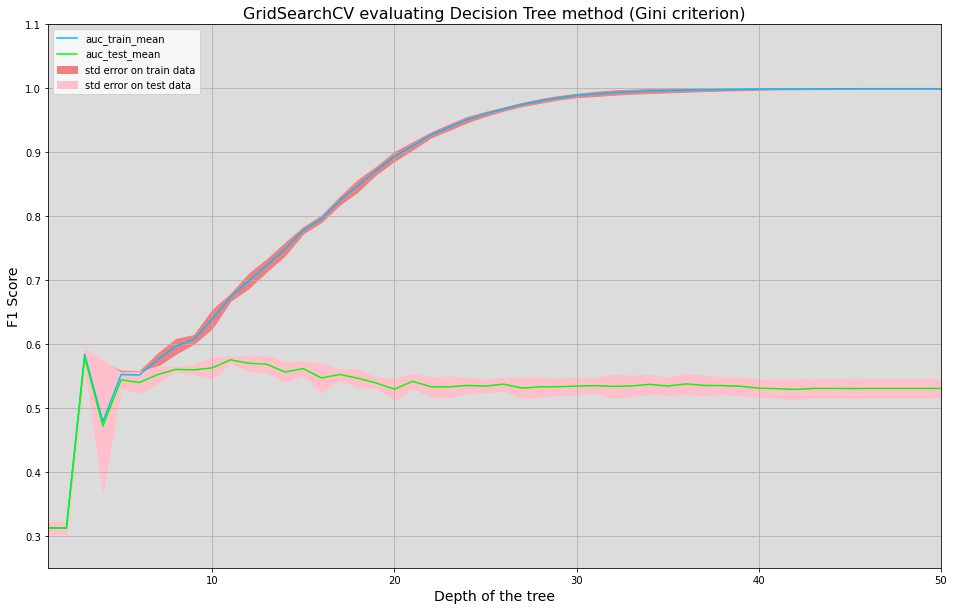

In [60]:
plt.figure(figsize=(16, 10))
plt.title("GridSearchCV evaluating Decision Tree method (Gini criterion)", fontsize=16)

plt.xlabel("Depth of the tree", fontsize=14)
plt.ylabel("F1 Score", fontsize=14)

ax = plt.gca()
ax.set_xlim(1, 50)
ax.set_ylim(0.25, 1.1)

X_axis = cv_results_dectree_["param_max_depth"]
Y_axis = cv_results_dectree_['mean_train_score']
Y2_axis = cv_results_dectree_["mean_test_score"]
Y3_axis_min = Y_axis - cv_results_dectree_['std_train_score']
Y3_axis_max = Y_axis + cv_results_dectree_['std_train_score']
Y4_axis_min = Y2_axis - cv_results_dectree_['std_test_score']
Y4_axis_max = Y2_axis + cv_results_dectree_['std_test_score']
ax.plot(X_axis, Y_axis,color='deepskyblue', label = 'auc_train_mean')
ax.fill_between(list(X_axis), list(Y3_axis_min), list(Y3_axis_max), color='lightcoral', label = 'std error on train data')

ax.plot(X_axis, Y2_axis, color = 'lime', label = 'auc_test_mean')
ax.fill_between(list(X_axis), list(Y4_axis_min), list(Y4_axis_max), color='pink',  label = 'std error on test data')
ax.grid()
ax.set_facecolor('gainsboro')
plt.legend(loc="best")
plt.show()

Наблюдаем явное переобучение с ростом глубины дерева:)

### SVM

In [13]:
from sklearn.svm import LinearSVC, SVC
svm = LinearSVC(max_iter = 5000)
gridsvm = {'C': np.logspace(-3,0,20)}
svm_grid = GridSearchCV(svm, gridsvm, scoring='f1', return_train_score = True)
svm_grid.fit(X_train, y_train)
print('Best parameters', svm_grid.best_params_)
print('Best score', svm_grid.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

Best parameters {'C': 0.006158482110660267}
Best score 0.3614200150364047


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [16]:
cv_results_svm = pd.DataFrame(svm_grid.cv_results_)

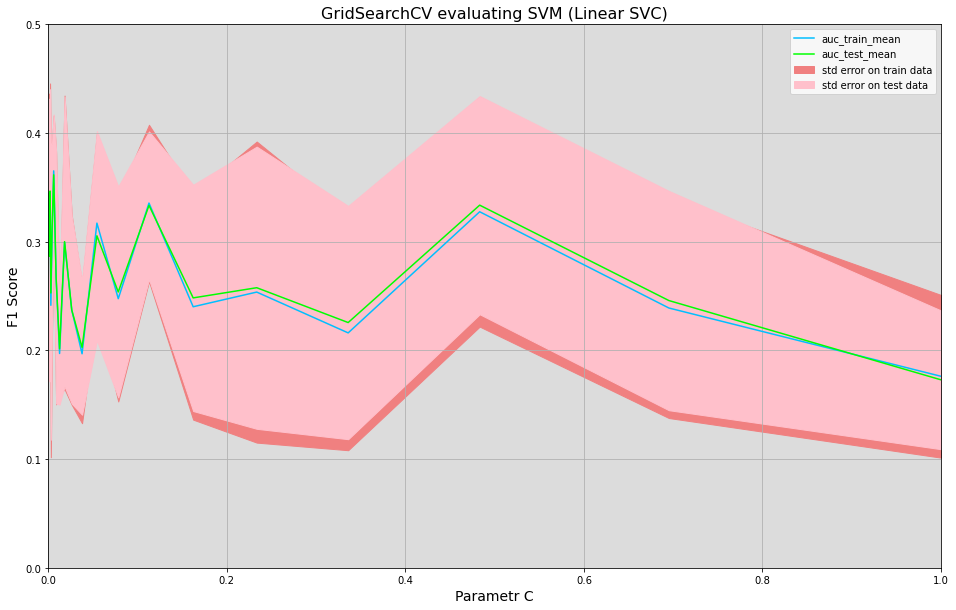

In [19]:
plt.figure(figsize=(16, 10))
plt.title("GridSearchCV evaluating SVM (Linear SVC)", fontsize=16)

plt.xlabel("Parametr C", fontsize=14)
plt.ylabel("F1 Score", fontsize=14)

ax = plt.gca()
ax.set_xlim(0, 1)
ax.set_ylim(0.0, 0.5)

X_axis = cv_results_svm["param_C"]
Y_axis = cv_results_svm['mean_train_score']
Y2_axis = cv_results_svm["mean_test_score"]
Y3_axis_min = Y_axis - cv_results_svm['std_train_score']
Y3_axis_max = Y_axis + cv_results_svm['std_train_score']
Y4_axis_min = Y2_axis - cv_results_svm['std_test_score']
Y4_axis_max = Y2_axis + cv_results_svm['std_test_score']
ax.plot(X_axis, Y_axis,color='deepskyblue', label = 'auc_train_mean')
ax.fill_between(list(X_axis), list(Y3_axis_min), list(Y3_axis_max), color='lightcoral', label = 'std error on train data')

ax.plot(X_axis, Y2_axis, color = 'lime', label = 'auc_test_mean')
ax.fill_between(list(X_axis), list(Y4_axis_min), list(Y4_axis_max), color='pink',  label = 'std error on test data')
ax.grid()
ax.set_facecolor('gainsboro')
plt.legend(loc="best")
plt.show()

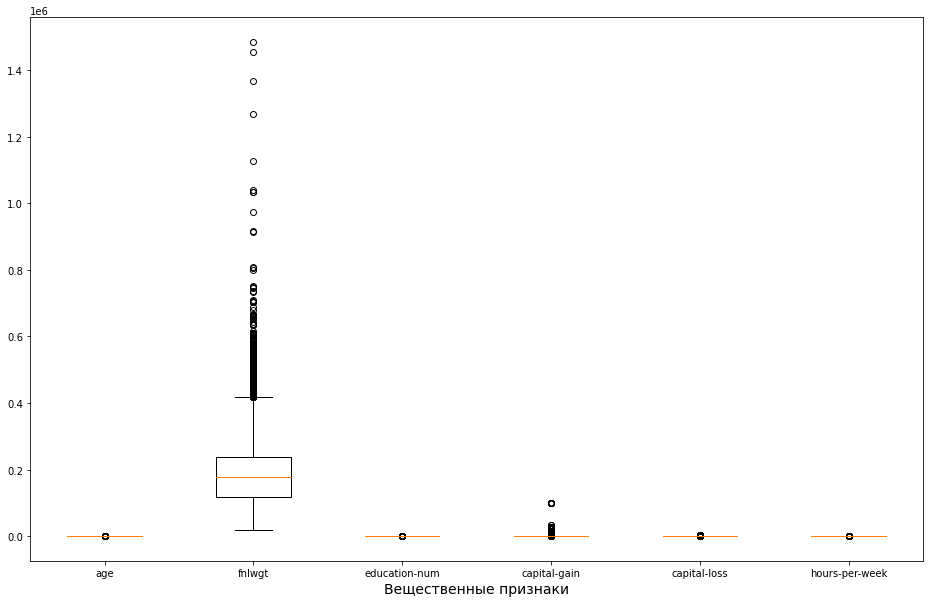

In [48]:
data = X_train
fig, ax = plt.subplots(figsize=(16, 10))
ax.boxplot(data, labels = ('age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'))
plt.xlabel("Вещественные признаки", fontsize=14)
plt.show()

In [35]:
X_train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,11510.000000,1.151000e+04,11510.000000,11510.000000,11510.00000,11510.000000
mean,38.574978,1.895727e+05,10.151955,960.058123,87.20808,40.888705
std,13.131313,1.075605e+05,2.541843,6324.819782,403.03413,12.058429
min,17.000000,1.930200e+04,1.000000,0.000000,0.00000,1.000000
25%,28.000000,1.166405e+05,9.000000,0.000000,0.00000,40.000000
50%,37.000000,1.777300e+05,10.000000,0.000000,0.00000,40.000000
75%,47.000000,2.368262e+05,13.000000,0.000000,0.00000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,3900.00000,99.000000


Значения вещественных признаков в датасете сильно отличаются. Наиболее выделяется признак fnlwgt, которые отличается от других (особенно возраста) на несколько порядков.

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)

In [15]:
X_test_sc = scaler.transform(X_test)

In [54]:
knn = KNeighborsClassifier()
gridknn = {'n_neighbors': np.linspace(1,50,50, dtype=int), 'p':[1, 2]}
knn_grid = GridSearchCV(knn, gridknn, scoring='f1', return_train_score = True)
knn_grid.fit(X_train_sc, y_train)
print('Best parameters', knn_grid.best_params_)
print('Best score', knn_grid.best_score_)

Best parameters {'n_neighbors': 11, 'p': 2}
Best score 0.5370865178328712


In [55]:
logreg = LogisticRegression(solver= 'liblinear')
gridlogreg = {'C': np.logspace(-3,3,40), 'penalty':['l1', 'l2']}
logreg_grid = GridSearchCV(logreg, gridlogreg, scoring='f1', return_train_score = True)
logreg_grid.fit(X_train_sc, y_train)
print('Best parameters', logreg_grid.best_params_)
print('Best score', logreg_grid.best_score_)

Best parameters {'C': 41.246263829013564, 'penalty': 'l1'}
Best score 0.5097995276089693


In [56]:
dectree = DecisionTreeClassifier(random_state = 13)
griddectree = {'max_depth': np.linspace(1,50,50, dtype=int), 'criterion':['gini', 'entropy']}
dectree_grid = GridSearchCV(dectree, griddectree, scoring='f1', return_train_score = True)
dectree_grid.fit(X_train_sc, y_train)
print('Best parameters', dectree_grid.best_params_)
print('Best score', dectree_grid.best_score_)

Best parameters {'criterion': 'gini', 'max_depth': 3}
Best score 0.5797208276677696


In [57]:
from sklearn.svm import LinearSVC, SVC
svm = LinearSVC(max_iter = 5000)
gridsvm = {'C': np.logspace(-3,0,20)}
svm_grid = GridSearchCV(svm, gridsvm, scoring='f1', return_train_score = True)
svm_grid.fit(X_train_sc, y_train)
print('Best parameters', svm_grid.best_params_)
print('Best score', svm_grid.best_score_)

Best parameters {'C': 1.0}
Best score 0.4716024591304066


In [17]:
X_train_scal = pd.DataFrame(X_train_sc, columns=list(X_train.columns.values), index=list(X_train.index))

In [18]:
data_adult_6 = data_adult_5.select_dtypes(include = 'object')

In [19]:
from sklearn.preprocessing import OneHotEncoder
dummies = OneHotEncoder(sparse=False)
data_dummies = dummies.fit_transform(data_adult_6)
dataframe_dummies = pd.DataFrame(data_dummies, index=list(data_adult_6.index))
dataframe_dummies_concat = pd.concat([data_adult_6, dataframe_dummies], axis=1)

In [20]:
dataframe_dummies_categorial = dataframe_dummies_concat.select_dtypes(exclude = 'object')

In [21]:
X_train_scal['ind'] = X_train_scal.index

In [22]:
dataframe_dummies_categorial['ind'] = dataframe_dummies_categorial.index

C:\Users\SASHA\AppData\Local\Temp/ipykernel_7236/572818438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_dummies_categorial['ind'] = dataframe_dummies_categorial.index


In [23]:
x_train_scal_categ = pd.merge(X_train_scal, dataframe_dummies_categorial, how = 'inner', on ='ind')

In [24]:
x_train_scal_categ.index = list(x_train_scal_categ['ind'])

In [25]:
x_train_scal_categ_fin = x_train_scal_categ.drop(columns = ['ind'])

In [26]:
X_test['ind'] = X_test.index

C:\Users\SASHA\AppData\Local\Temp/ipykernel_7236/3079315040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['ind'] = X_test.index


In [27]:
x_test_fin = pd.merge(X_test, dataframe_dummies_categorial, how = 'inner', on ='ind')

In [28]:
x_test_fin.index = list(x_test_fin['ind'])

In [29]:
x_test_final = x_test_fin.drop(columns = ['ind'])

In [30]:
x_test_final.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,0,1,2,3,...,47,48,49,50,51,52,53,54,55,56
2516,44,145246,14,0,0,44,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
12352,38,338320,15,0,1977,50,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9794,51,174754,9,0,0,38,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3269,45,172960,10,0,0,70,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9043,49,66385,9,5013,0,40,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [45]:
x_test_final_scal = scaler.transform(x_test_final)

In [46]:
x_test_final_sc = pd.DataFrame(x_test_final_scal, columns=list(x_test_final.columns.values), index=list(x_test_final.index))

In [47]:
x_test_final_sc.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,0,1,2,3,...,47,48,49,50,51,52,53,54,55,56
2516,0.369863,0.104320,0.866667,0.000000,0.000000,0.438776,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
12352,0.287671,0.264245,0.933333,0.000000,0.658123,0.500000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9794,0.465753,0.128762,0.533333,0.000000,0.000000,0.377551,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3269,0.383562,0.127276,0.600000,0.000000,0.000000,0.704082,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9043,0.438356,0.038999,0.533333,0.050131,0.000000,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


### KNN

In [40]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

In [41]:
knn = KNeighborsClassifier(n_neighbors = 11, p = 1)
knn_score = cross_val_score(knn, x_train_scal_categ_fin, y_train, cv=5, scoring = 'f1')

In [180]:
print('Средний f1-score на трейне:', np.mean(knn_score))

Средний f1-score на тесте: 0.6259199420216777


In [42]:
knn.fit(x_train_scal_categ_fin, y_train)

KNeighborsClassifier(n_neighbors=11, p=1)

In [206]:
y_pred = knn.predict(x_test_final)

In [208]:
print('Средний f1-score на тесте:', f1_score(y_test, y_pred))

Средний f1-score на тесте: 0.6330586524478914


In [48]:
y_pred = knn.predict(x_test_final_sc)

In [44]:
print('Средний f1-score на тесте:', f1_score(y_test, y_pred))

Средний f1-score на тесте: 0.6400862068965517


### LOG REG

In [210]:
logreg = LogisticRegression(C=41.24, penalty='l2',solver= 'liblinear')
logreg_score = cross_val_score(logreg, x_train_scal_categ_fin, y_train, cv=5, scoring = 'f1')
print('Средний f1-score на трейне:', np.mean(logreg_score))

Средний f1-score на трейне: 0.6643338113075915


In [211]:
logreg.fit(x_train_scal_categ_fin, y_train)
y_pred = logreg.predict(x_test_final)
print('Средний f1-score на тесте:', f1_score(y_test, y_pred))

Средний f1-score на тесте: 0.40854417254251346


### DECISION TREE

In [212]:
dectree = DecisionTreeClassifier(max_depth = 3, random_state = 13)
dectree_score = cross_val_score(dectree, x_train_scal_categ_fin, y_train, cv=5, scoring = 'f1')
print('Средний f1-score на трейне:', np.mean(dectree_score))

Средний f1-score на трейне: 0.6174205042380619


In [213]:
dectree.fit(x_train_scal_categ_fin, y_train)
y_pred = dectree.predict(x_test_final)
print('Средний f1-score на тесте:', f1_score(y_test, y_pred))

Средний f1-score на тесте: 0.6101578586135896


### SVM

In [214]:
svm = LinearSVC(C = 1.0, max_iter = 5000)
svm_score = cross_val_score(svm, x_train_scal_categ_fin, y_train, cv=5, scoring = 'f1')
print('Средний f1-score на трейне:', np.mean(svm_score))

Средний f1-score на трейне: 0.6612798010140801


In [217]:
svm.fit(x_train_scal_categ_fin, y_train)
y_pred_svm = svm.predict(x_test_final)
print('Средний f1-score на тесте:', f1_score(y_test, y_pred_svm))

Средний f1-score на тесте: 0.40854417254251346


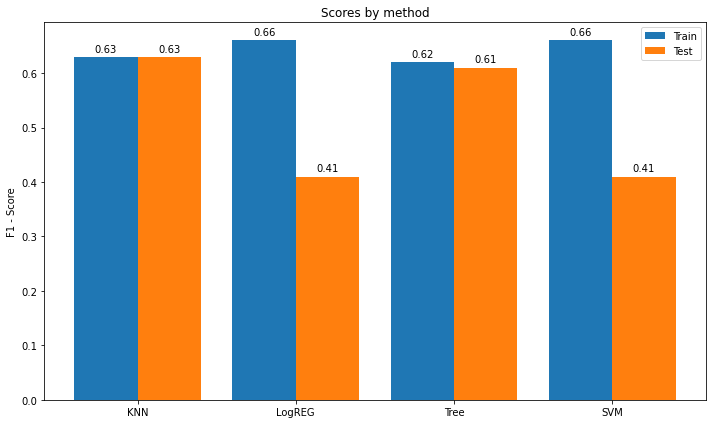

In [265]:
train_means = [0.63, 0.66, 0.62, 0.66]
test_means = [0.63, 0.41, 0.61, 0.41]

width = 0.4

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, train_means, width, label='Train')
rects2 = ax.bar(x + width/2, test_means, width, label='Test')

ax.set_ylabel('F1 - Score')
ax.set_title('Scores by method')
plt.xticks(range(4), ['KNN','LogREG','Tree','SVM'])
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

После кодирования категориальных признаков качество моделей (по крайней мере, на трейне) увеличилось. При проверке на отложенных логистическая регрессия и SVM показали намного худшие метрики, чем на кросс-валидации (возможно из-за переобучения (хотя метрики на трейне невысоки?), а возможно из-за не самого удачного подбора гиперпараметров или стратегии разбиения изначального датасета).
Что касается метода ближайших соседей и деревьев решений, метрики на тесте и трейне примерно одинаковы (значит, мы не переобучились), и f1-score хоть и невысок, но все же выше 60%. 